## Data-Driven Feature Engineering

### Finding the Correlation in Data to Generate a Correlation Plot Using Bank Data

In [1]:
#1
import pandas as pd
bankData = pd.read_csv('bank-data-set.csv', sep=";")
#bankData.head()

In [2]:
#2
# Import the set_option library from pandas
from pandas import set_option # used to define the display options for many operations.

In [3]:
#3
# Create a numerical variable that would store numerical variables; Correlation plot can be extracted only with numerical data.
bankNumeric = bankData[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']]

In [10]:
#4
set_option('display.width',150)
set_option('precision',3)
bankCorr = bankNumeric.corr(method='pearson')
bankCorr

,age,balance,duration,campaign,pdays,previous
age,1.000,0.098,-0.005,0.005,-0.024,0.001
balance,0.098,1.000,0.022,-0.015,0.003,0.017
duration,-0.005,0.022,1.000,-0.085,-0.002,0.001
campaign,0.005,-0.015,-0.085,1.000,-0.089,-0.033
pdays,-0.024,0.003,-0.002,-0.089,1.000,0.455
previous,0.001,0.017,0.001,-0.033,0.455,1.000


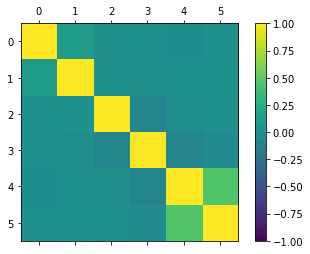

In [16]:
#5
from matplotlib import pyplot
corFig = pyplot.figure() #instantiate plotting class
figAxis = corFig.add_subplot(111) #grid parameter
corAx = figAxis.matshow(bankCorr,vmin=-1,vmax=1) #display the plot and normalize data
corFig.colorbar(corAx)
pyplot.show()

### Skewness


In [17]:
# Skewness of numeric attributes
bankNumeric.skew() 

age          0.685
balance      8.360
duration     3.144
campaign     4.899
pdays        2.616
previous    41.846
dtype: float64

#### Any value closer to 0 indicates a low degree of skewness.Variables that show higher values of right skew and left skew are candidates for further feature engineering by normalization.

#### Histograms

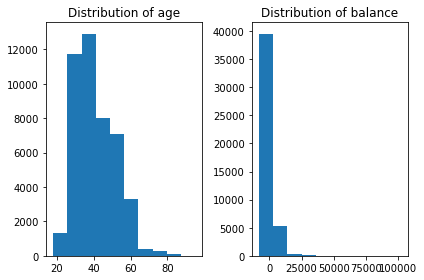

In [18]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(1,2) # number of subplots we want to include; (1,2) in subplots would mean one row and two columns.
axs[0].hist(bankNumeric['age'])
axs[0].set_title('Distribution of age')
axs[1].hist(bankNumeric['balance'])
axs[1].set_title('Distribution of balance')

# Ensure plts do not overlap
plt.tight_layout()

#### Density Plots

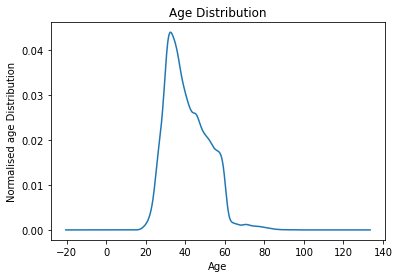

In [19]:
bankNumeric['age'].plot(kind='density', subplots=False, layout=(1,1))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Normalised age Distribution')
pyplot.show()

##### Density plots help in getting a smoother visualization of the distribution of the data.

#### Standardize data (0 mean, 1 stdev)

In [20]:
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
scaling = StandardScaler().fit(bankNumeric)
rescaledNum = scaling.transform(bankNumeric)
set_printoptions(precision=3)
print(rescaledNum)

[[ 1.607  0.256  0.011 -0.569 -0.411 -0.252]
 [ 0.289 -0.438 -0.416 -0.569 -0.411 -0.252]
 [-0.747 -0.447 -0.707 -0.569 -0.411 -0.252]
 ...
 [ 2.925  1.43   3.374  0.722  1.436  1.05 ]
 [ 1.513 -0.228  0.97   0.399 -0.411 -0.252]
 [-0.371  0.528  0.399 -0.247  1.476  4.524]]


#### Normalizing Data (Length of 1)

In [21]:
from sklearn.preprocessing import Normalizer
normaliser = Normalizer().fit(bankNumeric)
normalisedNum = normaliser.transform(bankNumeric)
set_printoptions(precision=3)
print(normalisedNum)

[[ 2.686e-02  9.923e-01  1.209e-01  4.630e-04 -4.630e-04  0.000e+00]
 [ 2.751e-01  1.813e-01  9.441e-01  6.252e-03 -6.252e-03  0.000e+00]
 [ 3.981e-01  2.413e-02  9.169e-01  1.206e-02 -1.206e-02  0.000e+00]
 ...
 [ 1.235e-02  9.805e-01  1.934e-01  8.579e-04  3.157e-02  5.147e-04]
 [ 6.776e-02  7.941e-01  6.039e-01  4.755e-03 -1.189e-03  0.000e+00]
 [ 1.234e-02  9.907e-01  1.204e-01  6.669e-04  6.269e-02  3.668e-03]]


If we observe the output, we can see that each value along a column is normalized so as to have a mean of 0 and standard deviation of 1. By transforming data in this way, we can easily compare across columns. 

For instance, in the age variable, we have data ranging from 18 up to 95. In contrast, for the balance data, we have data ranging from -8,019 to 102,127. We can see that both of these variables have different ranges of data that cannot be compared. The standard scaler function converts these data points at very different scales into a common scale so as to compare the distribution of data. Normalizer rescales each row so as to have a vector with a length of 1.